# Crop Yield Prediction Using Machine Learning Based on Weather and Soil Parameters

In [43]:
import numpy as np
import pandas as pd

In [44]:
# Loading Dataset
df = pd.read_csv('crop_yield_dataset.csv')
print(df.head())
print(df.info())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fertilizer  2596 non-null   float64
 1   temp        2596 non-null   float64
 2   N           2596 non-null   float64
 3   P           2596 non-null   float64
 4   K           2596 non-null   float64
 5   yeild       2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


In [45]:
# Check for missing values
print(df.isnull().sum())

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64


In [46]:
# rename the column yeild to yield
df.rename(columns={"yeild": "yield"}, inplace=True)

In [47]:
print(df.head())

   Fertilizer  temp     N     P     K  yield
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0


In [48]:
# Checking for duplicates
df.duplicated().head()

,0
0,False
1,False
2,False
3,True
4,False


In [49]:
# Count total duplicates
df.duplicated().sum()

np.int64(11)

In [50]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield
3,80.0,28.0,80.0,24.0,20.0,12.0
5,80.0,28.0,80.0,24.0,20.0,12.0
205,65.0,38.0,60.0,20.0,16.0,8.0
406,76.0,26.0,75.0,24.0,19.0,11.0
599,50.0,37.0,65.0,18.0,19.0,9.0
600,50.0,37.0,65.0,18.0,19.0,9.0
801,73.0,29.0,73.0,23.0,20.0,10.0
802,70.0,24.0,70.0,22.0,18.0,10.0
809,77.0,28.0,76.0,22.0,19.0,10.0
1001,55.0,38.0,65.0,19.0,17.0,7.0


In [51]:
# remove duplicates
df.drop_duplicates(inplace=True)

##### Now duplicates has been removed, just im checking once again my duplicates data

In [52]:
df.duplicated().head()

,0
0,False
1,False
2,False
4,False
6,False


In [53]:
# displays all duplicate rows
df[df.duplicated()]

,Fertilizer,temp,N,P,K,yield


##### No duplicate data in my dataset now

## Check for Outliers

In [54]:
import matplotlib.pyplot as plt

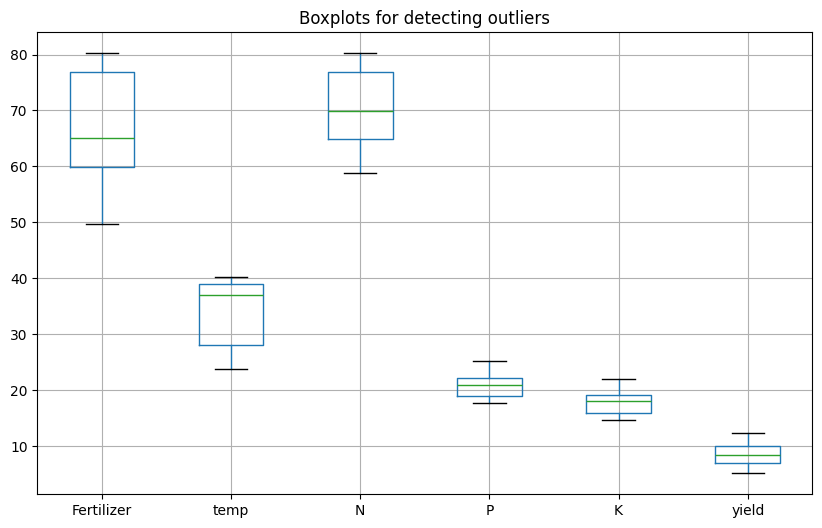

In [55]:
# plot boxplot for each numeric column
df[['Fertilizer', 'temp', 'N', 'P', 'K', 'yield']].boxplot(figsize=(10,6))
plt.title("Boxplots for detecting outliers")
plt.show()

In [56]:
# calculate z-scores
z = (df - df.mean()) / df.std()
# identify rows with outliers
outliers = df[(np.abs(z) > 3).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [Fertilizer, temp, N, P, K, yield]
Index: []


##### There is no outliers in my dataset

## Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [58]:
cat_cols = df.select_dtypes(include=["object"]).columns

In [59]:
cat_cols

Index([], dtype='object')

In [60]:
# Label Encoding for categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [61]:
# Feature Scaling for numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Split Data

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop("yield", axis=1)
y = df["yield"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
X_scaled

array([[ 1.3875238 , -1.09082698,  1.54089558,  1.67118928,  1.13166179],
       [ 1.07951284, -1.27709884,  1.24679627,  1.1637588 ,  1.13166179],
       [ 1.3875238 , -1.46337071,  1.54089558,  1.67118928,  1.13166179],
       ...,
       [ 1.28344395, -1.07053311,  1.12391458,  1.09457245,  1.64174647],
       [ 1.2740492 , -1.06449854,  1.08873983,  1.2000668 ,  1.58186384],
       [ 1.29001848, -1.28066324,  1.11809224,  1.18923018,  1.1114077 ]])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example with Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [64]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.12094108436852356
RMSE: 0.18417815030336385
R² Score: 0.9908976745056504


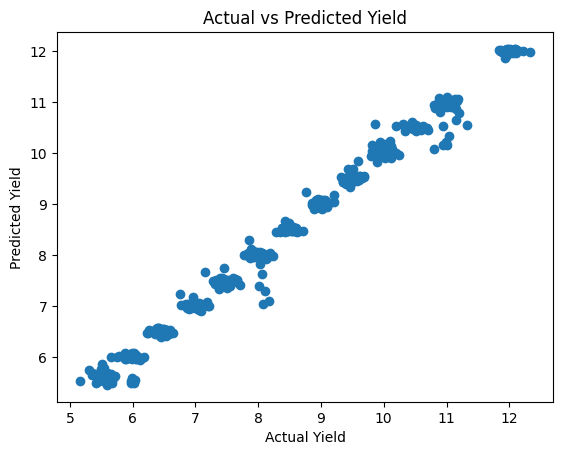

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split features and target
X = df.drop("yield", axis=1)
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                        MAE      RMSE        R²
Linear Regression  0.571969  0.691662  0.871630
Decision Tree      0.155139  0.241889  0.984300
Random Forest      0.120941  0.184178  0.990898


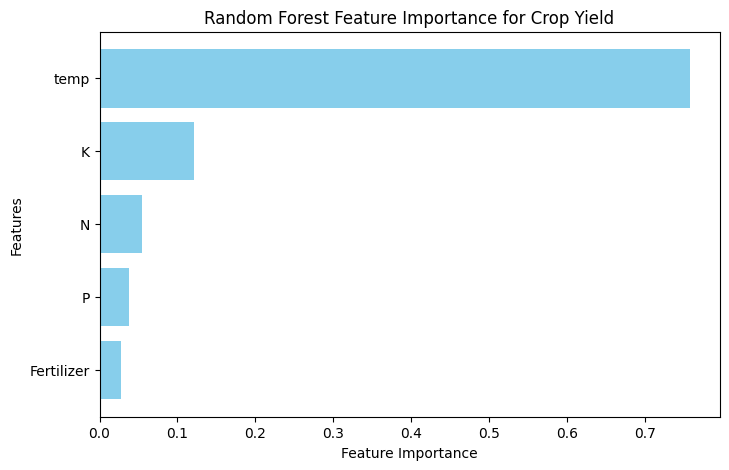

,Feature,Importance
1,temp,0.758224
4,K,0.120895
2,N,0.054817
3,P,0.038087
0,Fertilizer,0.027976


In [67]:
# Get feature importance from Random Forest
importances = model.feature_importances_
features = X.columns

# Create DataFrame for better visualization
feat_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Crop Yield")
plt.gca().invert_yaxis()
plt.show()

feat_importances

# **Random Forest works best with ~99%**

In [68]:
# Hyperparameter tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter distributions (wider range, but RandomizedSearch will sample randomly)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV (20 random trials, 3-fold CV)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,          # number of random combinations to try
    cv=3,               # 3-fold cross-validation
    scoring='r2',       # optimize for R²
    n_jobs=-1,          # use all cores
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_rf = random_search.best_estimator_

# Evaluate tuned model
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Tuned Random Forest Performance:
MAE: 0.12485365709700033
RMSE: 0.18730268475263068
R² Score: 0.9905862176621066


### Hyperparameter tuning was done using RandomizedSearchCV to optimize Random Forest. The tuned model achieved an R² score of 0.9906, confirming its strong predictive power.

In [70]:
# Save random forest model into pickle file.

In [76]:
import joblib

In [72]:
# # Save model
# joblib.dump(best_rf, "crop_yield_model.pkl")
# print("Model saved as crop_yield_model.pkl")

# # Load model
# loaded_model = joblib.load("crop_yield_model.pkl")
# print("Model loaded successfully!")

# # Test loaded model
# y_pred_loaded = loaded_model.predict(X_test)
# print("R² Score (Loaded Model):", r2_score(y_test, y_pred_loaded))


In [77]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save column names (important for ordering)
joblib.dump(list(X.columns), "columns.pkl")

# Save best model
joblib.dump(best_rf, "model.pkl")

print("Scaler, columns, and model saved successfully!")

Scaler, columns, and model saved successfully!
